In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [3]:
stock = pd.read_csv('01APR/ACC.txt', header=None)
stock

,0,1,2,3,4,5,6,7,8
0,ACC,20200401,09:08,964.80,964.80,964.80,964.80,456,0
1,ACC,20200401,09:16,964.80,964.80,951.25,956.20,4587,0
2,ACC,20200401,09:17,956.20,957.25,953.10,955.15,4555,0
3,ACC,20200401,09:18,954.95,959.00,954.95,958.55,5121,0
4,ACC,20200401,09:19,958.50,960.00,956.50,959.20,3944,0
...,...,...,...,...,...,...,...,...,...
374,ACC,20200401,15:29,963.25,964.00,963.00,963.20,1762,0
375,ACC,20200401,15:30,964.00,968.00,963.10,968.00,991,0
376,ACC,20200401,15:33,963.45,963.45,963.45,963.45,0,0
377,ACC,20200401,15:58,963.45,963.45,963.45,963.45,1,0


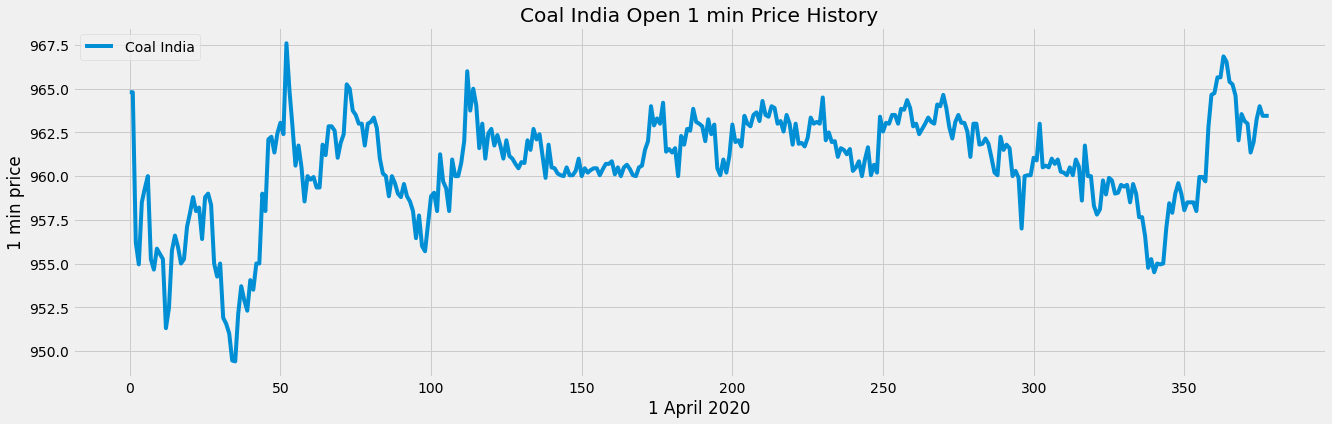

In [5]:
plt.figure(figsize=(20,6))
plt.plot(stock[3],label = 'Coal India')
plt.title('Coal India Open 1 min Price History')
plt.xlabel('1 April 2020')
plt.ylabel('1 min price')
plt.legend(loc='upper left')
plt.show()

In [13]:
#Creating Simple Moving Average with 30-day Window
Sma30=pd.DataFrame()
Sma30['Open Price']=stock[3].rolling(window=30).mean()

#Creating Simple Moving Average with 100-day Window
Sma100=pd.DataFrame()
Sma100['Open Price']=stock[3].rolling(window=100).mean()

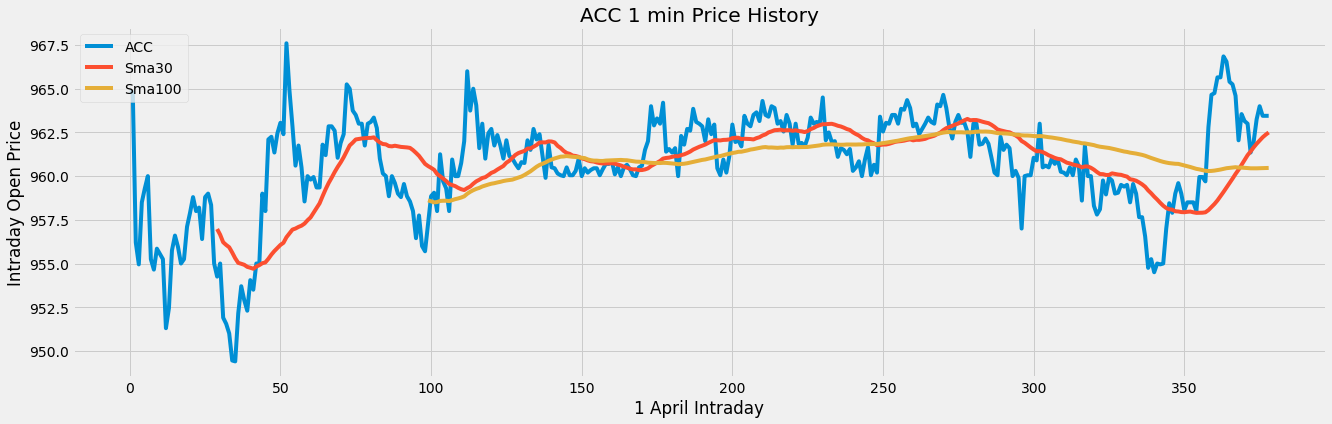

In [14]:
plt.figure(figsize=(20,6))
plt.plot(stock[3],label = 'ACC')
plt.plot(Sma30['Open Price'],label = 'Sma30')
plt.plot(Sma100['Open Price'],label = 'Sma100')
plt.title('ACC 1 min Price History')
plt.xlabel('1 April Intraday')
plt.ylabel('Intraday Open Price')
plt.legend(loc='upper left')
plt.show()

In [59]:
#Creating a new dataframe to store all data
data=pd.DataFrame()
data['stock']=stock[3]
data['Sma30']=Sma30['Open Price']
data['Sma100']=Sma100['Open Price']

In [61]:
data.dropna(inplace= True)
data.reset_index(inplace= True)
    

In [62]:
data = data.drop(['index'], axis=1)
data

,stock,Sma30,Sma100
0,957.30,960.576667,958.6155
1,958.85,960.475000,958.5560
2,959.05,960.363333,958.4985
3,958.00,960.121667,958.5165
4,961.25,959.996667,958.5795
...,...,...,...
275,963.25,961.851667,960.4465
276,964.00,962.036667,960.4515
277,963.45,962.221667,960.4555
278,963.45,962.370000,960.4595


In [ ]:
def buy_sell(data):
    `


        return(sigPriceBuy,sigPriceSell)

In [65]:
sigPriceBuy=[]
sigPriceSell=[]
flag=-1
for i in range(len(data)):
    if data['Sma30'][i]>data['Sma100'][i]:
        if flag != 1:
            sigPriceBuy.append(data['stock'][i])
            sigPriceSell.append(np.nan)
            flag=1
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    elif data['Sma30'][i]<data['Sma100'][i]:
        if flag != 0 :
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['stock'][i])
            flag = 0
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

([957.3], [nan])

In [67]:
data['Buy_Signal_Price']=sigPriceBuy
data['Sell_Signal_Price']=sigPriceSell

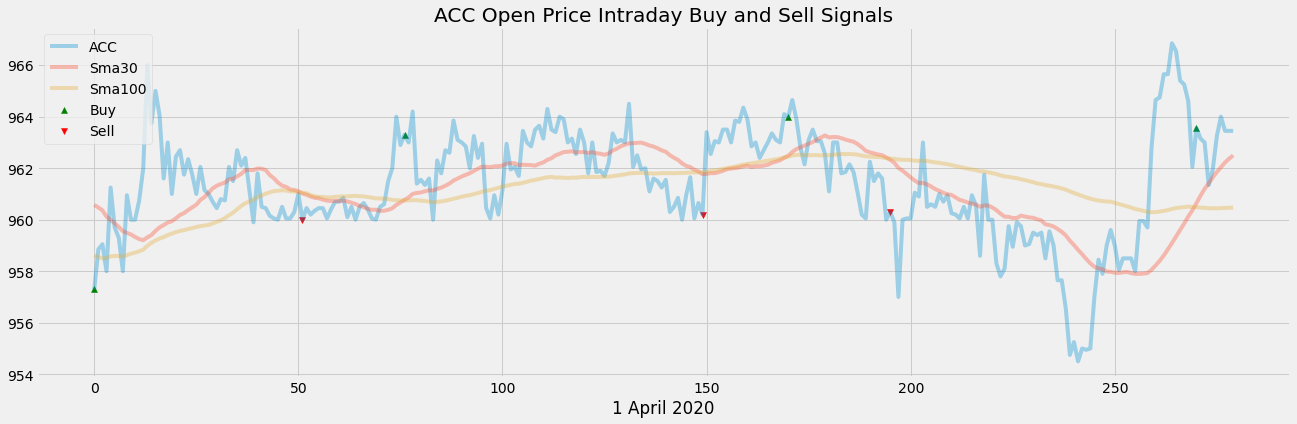

In [72]:
plt.figure(figsize=(20,6))
plt.plot(data.stock, label = 'ACC',alpha=0.35)
plt.plot(data.Sma30, label = 'Sma30' ,alpha=0.35)
plt.plot(data.Sma100, label = 'Sma100' ,alpha=0.35)


plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title('ACC Open Price Intraday Buy and Sell Signals')
plt.xlabel('1 April 2020')
plt.legend(loc='upper left')
plt.show()

